In [1]:
# import libraries
import torch
import numpy as np

In [4]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

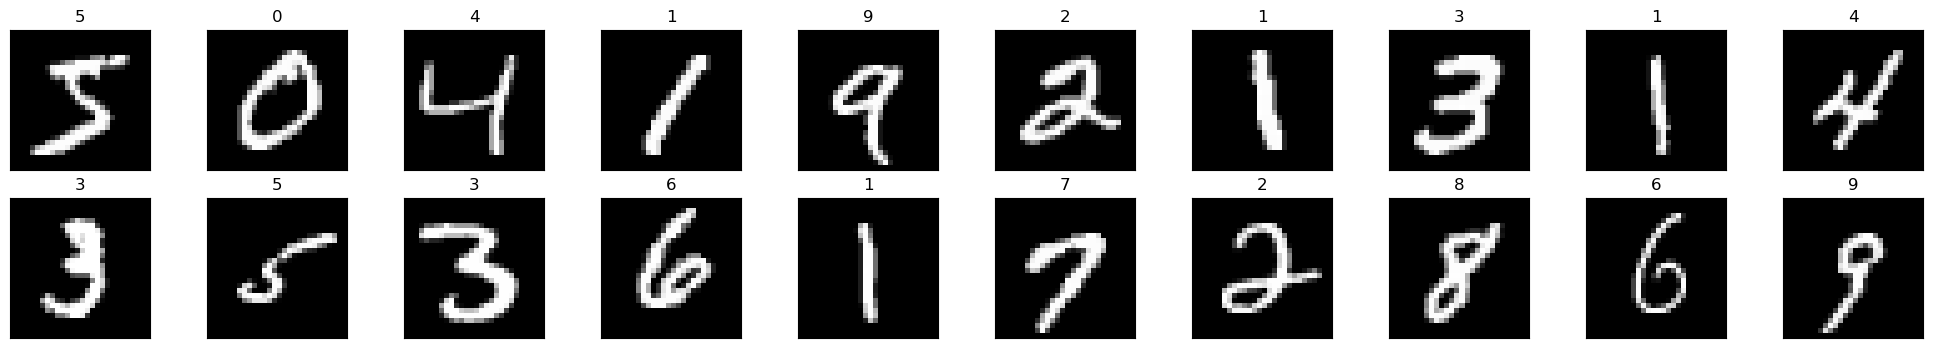

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.__next__()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [9]:
##一層MLP
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [10]:
##兩層MLP
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x)) ##多加一層
        return x

# initialize the NN
model2 = Net2()
print(model2)

Net2(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [12]:
##三層MLP
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x)) ##增加至三層
        return x

# initialize the NN
model3 = Net3()
print(model3)

Net3(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [13]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [14]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.01)

In [16]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.01)

In [17]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.792706
Epoch: 2 	Training Loss: 0.412062
Epoch: 3 	Training Loss: 0.370347
Epoch: 4 	Training Loss: 0.349179
Epoch: 5 	Training Loss: 0.335679
Epoch: 6 	Training Loss: 0.326062
Epoch: 7 	Training Loss: 0.318745
Epoch: 8 	Training Loss: 0.312925
Epoch: 9 	Training Loss: 0.308147
Epoch: 10 	Training Loss: 0.304128


In [18]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model2.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ####################
    # train the model2 #
    ####################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer2.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model2(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer2.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.764017
Epoch: 2 	Training Loss: 0.325630
Epoch: 3 	Training Loss: 0.280333
Epoch: 4 	Training Loss: 0.248894
Epoch: 5 	Training Loss: 0.223639
Epoch: 6 	Training Loss: 0.202557
Epoch: 7 	Training Loss: 0.184471
Epoch: 8 	Training Loss: 0.168935
Epoch: 9 	Training Loss: 0.155501
Epoch: 10 	Training Loss: 0.143806


In [19]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model3.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ####################
    # train the model3 #
    ####################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer3.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model3(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer3.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 1.262034
Epoch: 2 	Training Loss: 0.570234
Epoch: 3 	Training Loss: 0.464217
Epoch: 4 	Training Loss: 0.423106
Epoch: 5 	Training Loss: 0.393277
Epoch: 6 	Training Loss: 0.369903
Epoch: 7 	Training Loss: 0.351472
Epoch: 8 	Training Loss: 0.336613
Epoch: 9 	Training Loss: 0.324426
Epoch: 10 	Training Loss: 0.314248


In [20]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.292907

Test Accuracy of     0: 98% (962/980)
Test Accuracy of     1: 97% (1106/1135)
Test Accuracy of     2: 87% (905/1032)
Test Accuracy of     3: 90% (915/1010)
Test Accuracy of     4: 92% (911/982)
Test Accuracy of     5: 87% (778/892)
Test Accuracy of     6: 94% (907/958)
Test Accuracy of     7: 91% (937/1028)
Test Accuracy of     8: 88% (859/974)
Test Accuracy of     9: 90% (912/1009)

Test Accuracy (Overall): 91% (9192/10000)


In [22]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model2.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model2(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.144217

Test Accuracy of     0: 98% (968/980)
Test Accuracy of     1: 98% (1119/1135)
Test Accuracy of     2: 95% (982/1032)
Test Accuracy of     3: 95% (969/1010)
Test Accuracy of     4: 95% (939/982)
Test Accuracy of     5: 96% (861/892)
Test Accuracy of     6: 95% (914/958)
Test Accuracy of     7: 93% (965/1028)
Test Accuracy of     8: 93% (915/974)
Test Accuracy of     9: 94% (953/1009)

Test Accuracy (Overall): 95% (9585/10000)


In [23]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model3.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model3(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.319601

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 96% (1001/1032)
Test Accuracy of     3: 97% (989/1010)
Test Accuracy of     4: 97% (955/982)
Test Accuracy of     5: 97% (871/892)
Test Accuracy of     6:  0% ( 0/958)
Test Accuracy of     7: 95% (979/1028)
Test Accuracy of     8: 95% (934/974)
Test Accuracy of     9: 95% (963/1009)

Test Accuracy (Overall): 87% (8789/10000)


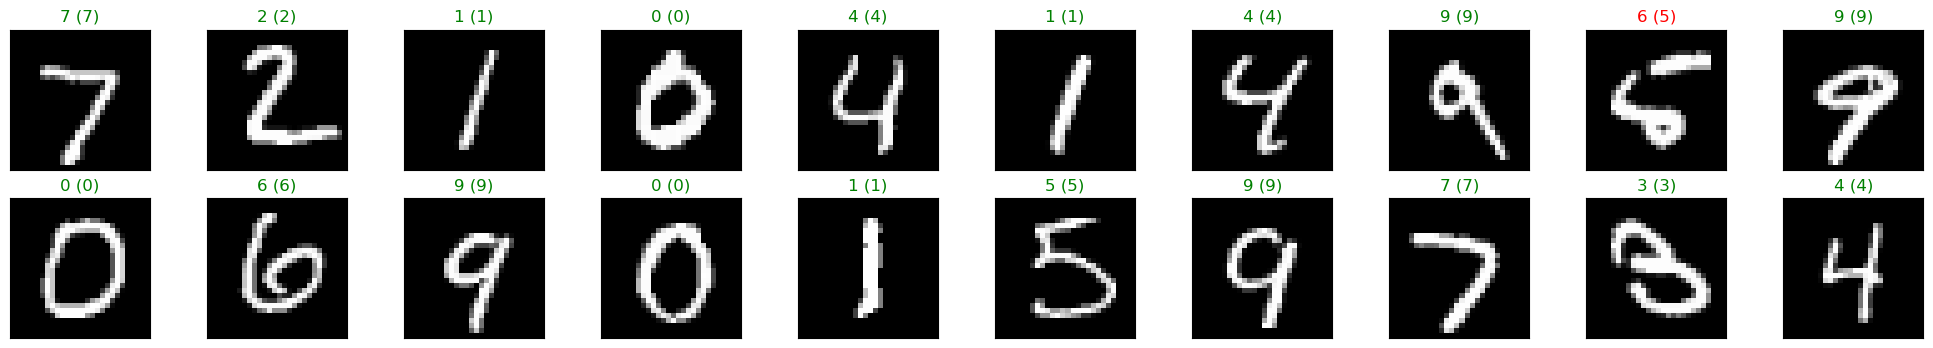

In [24]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.__next__()


# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

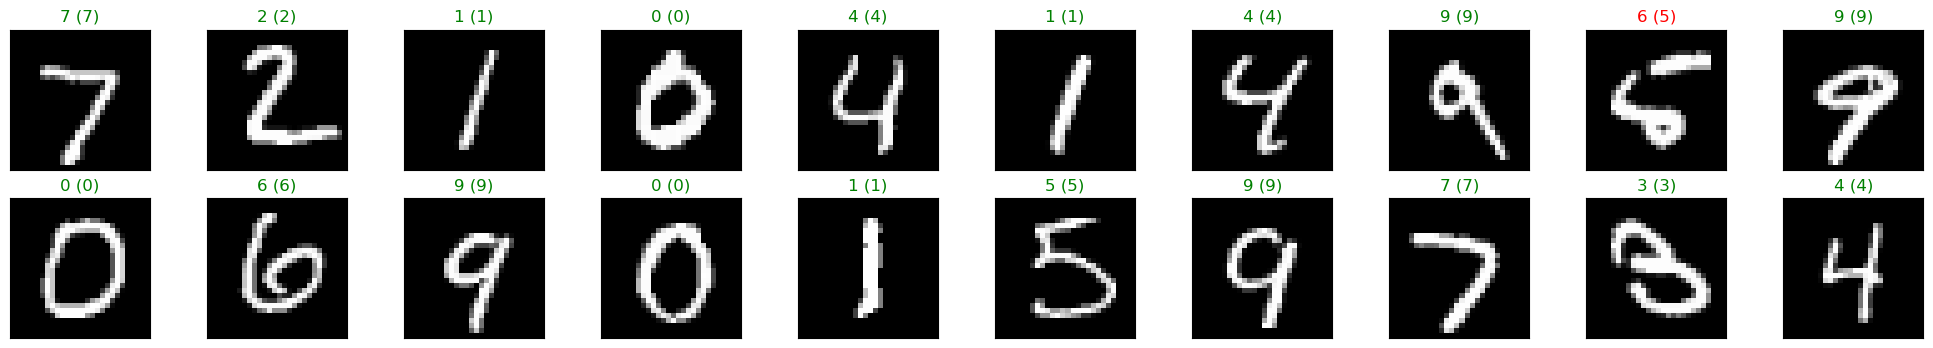

In [25]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.__next__()


# get sample outputs
output = model2(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

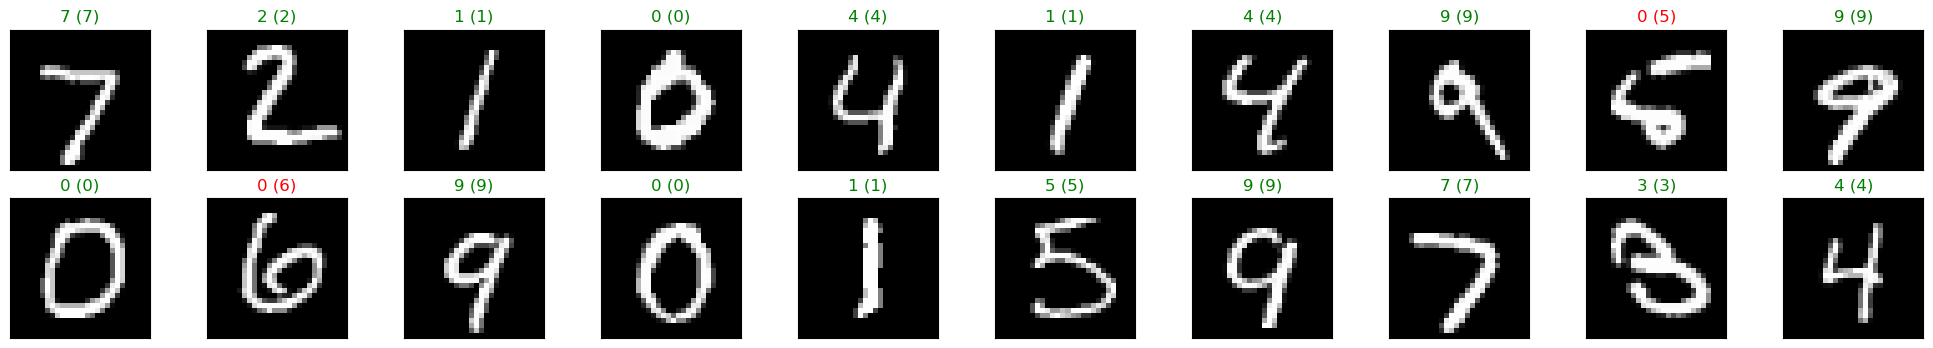

In [26]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.__next__()


# get sample outputs
output = model3(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [ ]:
理論上來說，使用越多層的MLP，應當更能達到期望值，且從一層至二層MLP也的確將Accuracy從91%提升至95%
然而，三層MLP的Accuracy卻降至87%，從預測出的圖片來看，他將6預測為0，判斷可能原因是模型過度適配的問題，亦或是超參數沒有取到一個合適的數值
再從三層MLP除了6以外的預測數字之外，其實0~5和7~9的Accuracy都是每層相較於前一層有所提升的，這邊簡單做個排版：

                一層MLP                                         二層MLP                                      三層MLP
Test Accuracy of     0: 98% (962/980)          Test Accuracy of     0: 98% (968/980)         Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 97% (1106/1135)        Test Accuracy of     1: 98% (1119/1135)       Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 87% (905/1032)         Test Accuracy of     2: 95% (982/1032)        Test Accuracy of     2: 96% (1001/1032)
Test Accuracy of     3: 90% (915/1010)         Test Accuracy of     3: 95% (969/1010)        Test Accuracy of     3: 97% (989/1010)
Test Accuracy of     4: 92% (911/982)          Test Accuracy of     4: 95% (939/982)         Test Accuracy of     4: 97% (955/982)
Test Accuracy of     5: 87% (778/892)          Test Accuracy of     5: 96% (861/892)         Test Accuracy of     5: 97% (871/892)
Test Accuracy of     6: 94% (907/958)          Test Accuracy of     6: 95% (914/958)         Test Accuracy of     6:  0% ( 0/958)
Test Accuracy of     7: 91% (937/1028)         Test Accuracy of     7: 93% (965/1028)        Test Accuracy of     7: 95% (979/1028)
Test Accuracy of     8: 88% (859/974)          Test Accuracy of     8: 93% (915/974)         Test Accuracy of     8: 95% (934/974)
Test Accuracy of     9: 90% (912/1009)         Test Accuracy of     9: 94% (953/1009)        Test Accuracy of     9: 95% (963/1009)

不難看出Accuracy因為MLP層數的增加而上升
